## Analyse Stock Correlation for Pair-Trading Opportunities

In [27]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import util_functions as uf

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [15]:
df_raw = pd.DataFrame()

In [16]:
stock_list = ['AAPL','TSLA','NVDA','GOOG','META','ADBE','AMZN','MSFT','KO']

In [17]:
for stock in stock_list:
    df_raw[stock] = uf.getdata(stock,'Adj Close')['Adj Close']
    df_raw[stock] = df_raw[stock].pct_change()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [13]:
df_raw = df_raw.dropna(axis=1) 

In [19]:
df_raw = df_raw.dropna(axis=0) 

## Correlation

<Axes: >

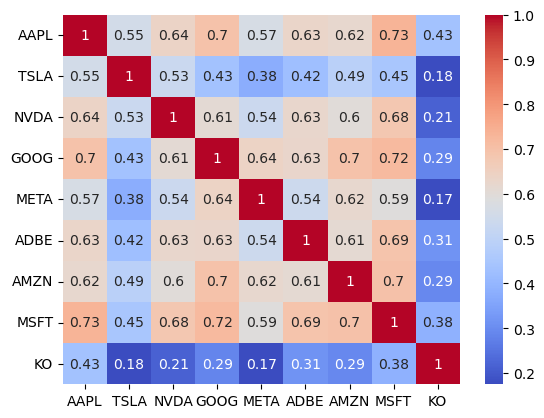

In [21]:
# Step 3: Compute correlation
correlation_matrix = df_raw.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

## Lagged Correlations

In [22]:
lags = range(0, 11)

for stock in df_raw.columns.to_list():

    df_stock_lag = pd.DataFrame()

    df_lagged = df_raw.copy()

    for lag in lags:

        df = df_raw.copy()

        df[stock] = df_raw[stock].shift(lag)
        lagged_correlations = df.corr()[[stock]].drop(stock, axis=0)

        col_name = "{}_lag{}".format(stock, lag)
        df_stock_lag[col_name] = lagged_correlations
    
    max_value = df_stock_lag.max().max()
    max_index = df_stock_lag.max(axis=1).idxmax()
    max_col = df_stock_lag.max().idxmax()

    # Print the results
    print("{} and {} has the highest correlation = {}".format(max_index, max_col, max_value))
    print("=========================================================================")


MSFT and AAPL_lag0 has the highest correlation = 0.7333625060911617
AAPL and TSLA_lag0 has the highest correlation = 0.5520492160172689
MSFT and NVDA_lag0 has the highest correlation = 0.6837561830949094
MSFT and GOOG_lag0 has the highest correlation = 0.718284328834968
GOOG and META_lag0 has the highest correlation = 0.6405313046028063
MSFT and ADBE_lag0 has the highest correlation = 0.6908458998131771
MSFT and AMZN_lag0 has the highest correlation = 0.6996324105096193
AAPL and MSFT_lag0 has the highest correlation = 0.7333625060911617
AAPL and KO_lag0 has the highest correlation = 0.43359179469948683
